<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/Skripsi_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [287]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



#new
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from xgboost import XGBClassifier




np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [245]:
dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")

df = dataset_df
dataset_df.head()

<ipython-input-245-1791d0b64d6a>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")


,profile_id,order_id,accom_id,room_id,accom_chain_name,selling_price_idr,gbv_idr,coupon_idr,sales_date_utc7,sales_timestamp,...,next_category_1,next_category_2,next_category_3,next_latest_sentiment_analysis,next_room_type,next_bed_type,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
0,ET0LCvUlRKbtFLscAFkCi/WWLLw=,HCcNAiyXSymMGRQkSqzAAtFlMxc=,Uz+MOvMFoXZMCkmixPFGgpTm9lU=,L6H56k4Rou+RiVAeX2QFwrv6xwY=,NaN,524927.868189,570579.672607,0,2018-09-22,2018-09-22 09:35:41.027 UTC,...,NaN,NaN,NaN,NaN,DELUXE,ONE_DOUBLE_BED,NaN,2,7,1
1,exoQ3kUraPU4wFlzPkk5+ykBwTs=,sRDgi4iW3och3ZkFvI/7aW1P3xY=,PMJIaKNhV02UjxNiev3Ltce2kNQ=,h10O5X/RJjDGNa+4oSVmxZBhplQ=,iCwYKECg554FmWkZKOS6O7I8nXA=,853068.342720,721837.932454,0,2018-09-22,2018-09-22 03:16:16.417 UTC,...,NaN,NaN,NaN,NaN,NaN,KING,25.0,2,4,1
2,9GuIvtbdJFVdHFM/0x1p345wCwM=,xlSmSKB3tahvfYZ1DEq0Zu3nek0=,Y4UBm0bDkNkWK2JWpzmbJTlQLqc=,lqSNqRT0DKCxUC60BE3jFG5BwNQ=,NaN,192613.180745,188957.123586,0,2018-09-22,2018-09-22 01:28:14.882 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,18.5,2,4,1
3,QXB7Zobjy0aW6Q8SYt8DQD7fSrQ=,3d4xj1dEU8Q1tSY2APAxmcjlwFw=,TxJe7ItZLbtw1K8Aqlem51jNvaE=,P+HWuys1viVCcm4/aqWuEJ91tb0=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,300377.277202,404480.886678,0,2018-09-22,2018-09-22 22:09:32.201 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED_OR_TWO_SINGLE_B,26.0,2,4,1
4,UVEV2qykZPJQ/kfd20M2/86qKrM=,Qnf6/o5tErU5iMEiwzkWhFfiIjc=,kneU7W4rjhdyr4nKoVOP17bfaVk=,wmCmvcyYOxvDtr5DADgjj48ClEs=,HIwm7tZAAnF5sNurgy85MraVTB0=,225738.474167,231019.601478,0,2018-09-22,2018-09-22 15:08:32.967 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,16.0,2,9,1


In [246]:
df["room_size_inmeter"].fillna(df["room_size_inmeter"].mean(),inplace = True)
df["next_room_size_inmeter"].fillna(df["next_room_size_inmeter"].mean(), inplace = True)
df["bed_type"].fillna(df["bed_type"].mode().iloc[0], inplace = True)
df["next_bed_type"].fillna(df["next_bed_type"].mode().iloc[0], inplace = True)
df["hotel_score"].fillna(df["hotel_score"].mean(),inplace = True)
df["next_hotel_score"].fillna(df["next_hotel_score"].mean(),inplace = True)

## Data Cleaning

In [247]:
missing_value = dataset_df.isnull().sum() *100 / len(dataset_df) 

df_missing_value = pd.DataFrame( {"missing_count" : dataset_df.isnull().sum(),
             "percent_missing" : missing_value })
print(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20))
print("length of columns are : ", len(dataset_df.columns))

                                missing_count  percent_missing
customer_type                           18970       100.000000
next_latest_sentiment_analysis          18970       100.000000
latest_sentiment_analysis               18969        99.994729
next_category_3                         18946        99.873484
next_category_0                         18899        99.625725
next_category_1                         18899        99.625725
next_category_2                         18899        99.625725
category_3                              18854        99.388508
category_2                              18712        98.639958
category_1                              18712        98.639958
category_0                              18711        98.634686
pid_score                               14678        77.374802
next_pid_score                          14467        76.262520
room_type                               13324        70.237217
next_room_type                          12949        68

In [248]:
#selecting not from the list 
df_clean = dataset_df.loc[:, ~dataset_df.columns.isin(df_missing_value.sort_values(by = "missing_count",ascending=False).head(17).index)]
df_clean = df_clean.dropna()


df_clean = df_clean.loc[:, ~df_clean.columns.isin(["count_buy_that_day",
                                                   "count_buy_that_month",
                                                   "count_buy_that_next_day",
                                                   "room_id",
                                                   "order_id",
                                                   "profile_id",
                                                   "interface",
                                                   "last_issued_date",
                                                   "next_bed_type",
                                                   "month",
                                                   "next_time_stamp",
                                                   "sales_timestamp",
                                                   "next_is_use_coupon",
                                                   "next_num_rooms",
                                                   "next_gbv_idr",
                                                   "accom_id" ,
                                                   "check_in_date",
                                                   "check_out_date",
                                                   "sales_date_utc7",
                                                   "next_check_in_date",
                                                   "next_check_out_date",
                                                   "next_sales_date",
                                                   "next_is_use_coupon",
                                                   "is_use_coupon",
                                                   "next_coupon_idr",
                                                   "coupon_idr"])]



In [249]:
df = df_clean 
missing_value = df_clean.isnull().sum() *100 / len(dataset_df) 
df_missing_value = pd.DataFrame( {"missing_count" : df_clean.isnull().sum(),
             "percent_missing" : missing_value} )
print("length columns : ",len(df_clean.columns)  )
print(df_missing_value.sort_values(by = "missing_count",ascending=False))

length columns :  16
                        missing_count  percent_missing
selling_price_idr                   0              0.0
gbv_idr                             0              0.0
accom_region                        0              0.0
accom_star_rating                   0              0.0
num_rooms                           0              0.0
accom_type                          0              0.0
bed_type                            0              0.0
room_size_inmeter                   0              0.0
hotel_score                         0              0.0
next_accom_id                       0              0.0
next_accom_region                   0              0.0
next_accom_star_rating              0              0.0
next_accom_type                     0              0.0
next_selling_price                  0              0.0
next_hotel_score                    0              0.0
next_room_size_inmeter              0              0.0


In [250]:
#adding index so to make it easier to merge 
df["Index"] = range(1,len(df)+1)

In [251]:
#defining independent and dependent
x =["selling_price_idr",
    "gbv_idr",
    "accom_region",
    "accom_star_rating",
    "num_rooms",
    "accom_type",
    "bed_type",
    "room_size_inmeter",
    "hotel_score",
    "next_accom_id"
    ]
y =["next_accom_id",
    "next_accom_region",
    "next_accom_star_rating",
    "next_accom_type",
    "next_selling_price",
    "next_hotel_score",
    "next_room_size_inmeter"
    ]



y_quantitative = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
y_qualitative  = ["next_accom_region","next_accom_type"]    



In [252]:
df[y]["next_accom_id"].nunique()

7363

### Removing Outliers

In [253]:
#Removing Outliers 
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

# list of columns to remove outliers from
# remove outliers from selected columns
y_cleaned = remove_outliers(df[y], y_quantitative)
y = y_cleaned



###Group all accom

In [254]:
y_grouped = y.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()
y = y_grouped.iloc[:,1:]
y.head()

<ipython-input-254-ca35bd5d987e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_grouped = y.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()


,next_accom_region,next_accom_type,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter
0,Jawa Timur,HOMESTAY,1.0,896201.625996,8.434579,12.00000
1,Jawa Barat,HOTEL,2.0,513298.441428,8.420212,16.00000
2,Trang,HOTEL,2.0,294486.253722,8.831921,24.99785
3,Jawa Timur,HOTEL,2.0,437789.420298,8.572257,16.00000
4,Chonburi,GUESTHOUSE,2.0,212348.750150,8.017347,16.00000


### VIF Checking (only for Quantitative)

In [255]:
#coba pake korelasi
vif_df = pd.DataFrame()
vif_df["Feature"] = y[y_quantitative].columns
vif_df ["VIF"]= [variance_inflation_factor(y[y_quantitative].values, i) for i in range(len(y[y_quantitative].columns))]
vif_df

#coba check chi-square untuk kategorikal

,Feature,VIF
0,next_accom_star_rating,12.373781
1,next_selling_price,5.640966
2,next_hotel_score,17.477728
3,next_room_size_inmeter,17.943799


In [256]:
#correlation for quantitative columns 
print("Correlation : ")
print (pd.DataFrame (y[y_quantitative].corr()))

Correlation : 
                        next_accom_star_rating  next_selling_price  \
next_accom_star_rating                1.000000            0.494819   
next_selling_price                    0.494819            1.000000   
next_hotel_score                      0.293036            0.227470   
next_room_size_inmeter                0.410499            0.262308   

                        next_hotel_score  next_room_size_inmeter  
next_accom_star_rating          0.293036                0.410499  
next_selling_price              0.227470                0.262308  
next_hotel_score                1.000000                0.170085  
next_room_size_inmeter          0.170085                1.000000  


In [257]:
#chi square test for Categorical Variable
contingency_table = pd.crosstab(y["next_accom_region"],y["next_accom_type"])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

if p_value <= 0.05 : 
  print("Accepted")
else :
  print("Rejected")



Chi-square value: 3391.244647892493
P-value: 1.5592206207686093e-200
Degrees of freedom: 1233
Accepted


### Min Max Scaling

In [258]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )

      # print(i, max)
      # print(i, min)
      print("")
  return scaled_columns

y_quantitative = build_min_max_scaler(y_grouped[y_quantitative])

y_final = y_quantitative 
y_final["next_accom_region"] = y_grouped["next_accom_region"]
y_final["next_accom_type"] = y_grouped["next_accom_type"]
y_final.head()

<ipython-input-258-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-258-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-258-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,0.00000,0.56229,0.49025,0.18750,Jawa Timur,HOMESTAY
1,0.33333,0.31014,0.48179,0.31250,Jawa Barat,HOTEL
2,0.33333,0.16605,0.72406,0.59368,Trang,HOTEL
3,0.33333,0.26042,0.57126,0.31250,Jawa Timur,HOTEL
4,0.33333,0.11196,0.24473,0.31250,Chonburi,GUESTHOUSE


# K-Prototype Labeling

In [259]:
costs = []
n_clusters=[]
silhouette_scores = []
numerical_variable = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
for i in range (2,20):
  categorical_columns = [4,5]
  kp = KPrototypes(n_clusters=i, init='Huang', n_init=5, random_state = 2019)
  clusters = kp.fit_predict(y_final, categorical=categorical_columns)
  costs.append(kp.cost_)
  silhouette_avg = silhouette_score(y_final[numerical_variable], clusters, metric='euclidean')
  silhouette_scores.append(silhouette_avg)
  n_clusters.append(i)

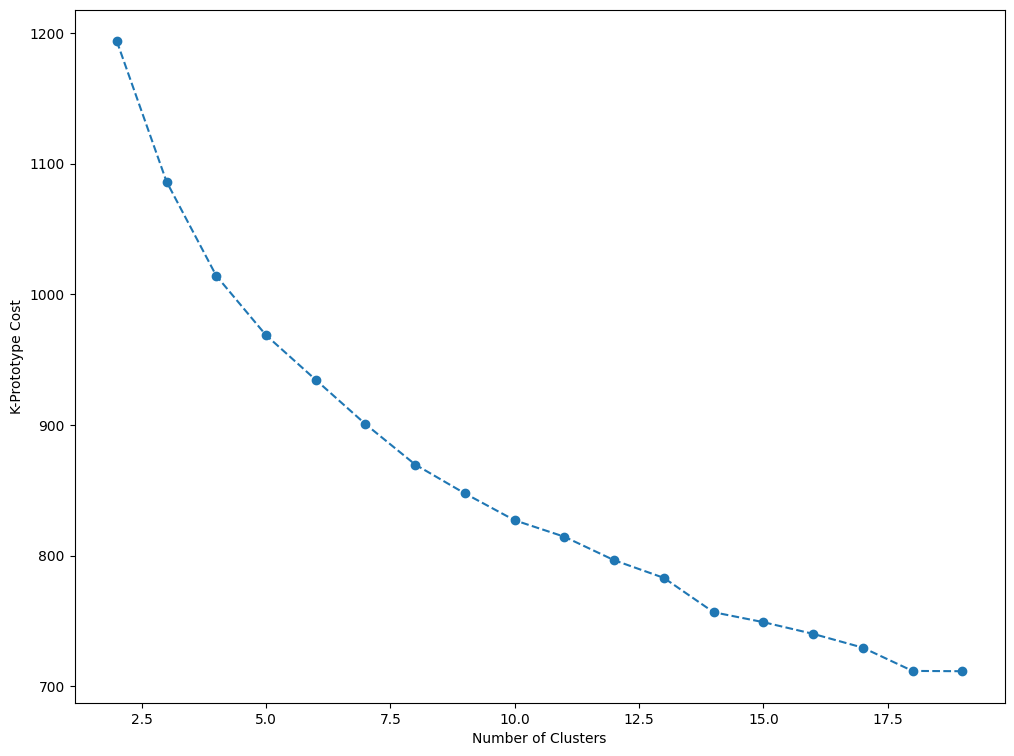

In [260]:
#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, costs, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype Cost')
plt.show()

2


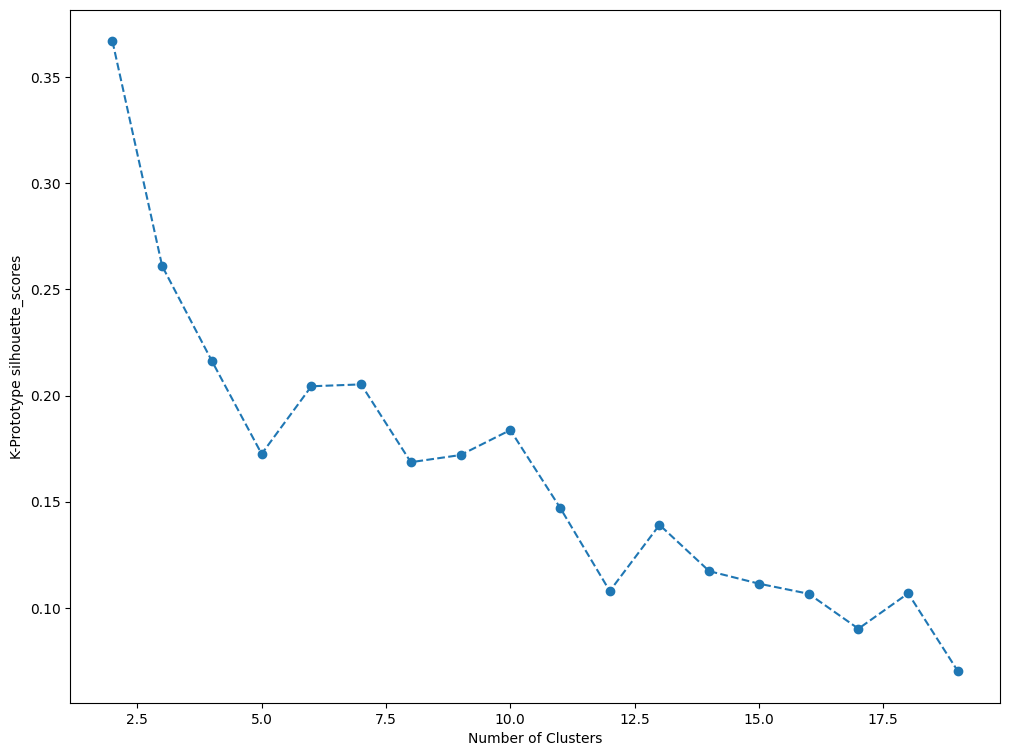

In [261]:
#plotting the optimal using sillhouette
optimal_n_clusters = n_clusters[np.argmax(silhouette_scores)]

print (optimal_n_clusters)




#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype silhouette_scores')
plt.show()



In [276]:
categorical_columns = [4,5]
kp = KPrototypes(n_clusters=7, init='Huang', n_init=2, verbose=0, random_state= 42 )
clusters = kp.fit_predict(y_final, categorical=categorical_columns)


ValueError: ignored

In [277]:
y_final["dependent"] = pd.DataFrame(clusters,columns = ["dependent"])
y_final["next_accom_id"] = y_grouped["next_accom_id"]

Descriptive for custer

In [278]:
### adding cluster into the dataframe 
df = pd.merge(df[x],y_final[['next_accom_id','dependent']],on='next_accom_id', how='left')
df = df.dropna(axis = 0,subset = ["dependent"] )


df_copy = df 

### Classification Modeling

In [279]:
#defining X 
X = ["selling_price_idr","gbv_idr","accom_region","accom_star_rating","num_rooms","accom_type","bed_type","room_size_inmeter","hotel_score"]
df_x =df[X]

accom_region_get_dummies  = pd.get_dummies(df_x["accom_region"],drop_first = True,prefix = "accom_region")
accom_type_get_dummies  = pd.get_dummies(df_x["accom_type"],drop_first = True,prefix = "accom_type")
bed_type_get_dummies  = pd.get_dummies(df_x["bed_type"],drop_first = True,prefix = "bed_type")

df_x = df_x.drop(['accom_region',"accom_type","bed_type"],axis = 1)

df_x = df_x.join(accom_region_get_dummies)
df_x = df_x.join(accom_type_get_dummies)
df_x = df_x.join(bed_type_get_dummies)
df_x


#defining Y 

y = ["dependent"]
df_y = df[y]

In [280]:
X_train, X_test, y_train,y_test= train_test_split(df_x,df_y, test_size = 0.2 , random_state = 42, stratify = df_y )


In [281]:
rfc = RandomForestClassifier(random_state = 42 )
#fit to model 
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)


<ipython-input-281-e7a12b4feb64>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


0.2723289518031682

In [282]:
cross_val_score(rfc, X_train, y_train, cv=10).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.2678661895094553

In [283]:
n_estimators = [10, 100, 500]
max_depth = [None, 3, 5, 7]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


grid = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=2,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: 0.303186 using {'max_depth': 7, 'n_estimators': 500}
0.234659 (0.001349) with: {'max_depth': None, 'n_estimators': 10}
0.268628 (0.000759) with: {'max_depth': None, 'n_estimators': 100}
0.271746 (0.001349) with: {'max_depth': None, 'n_estimators': 500}
0.244606 (0.002697) with: {'max_depth': 3, 'n_estimators': 10}
0.268965 (0.013739) with: {'max_depth': 3, 'n_estimators': 100}
0.282620 (0.002107) with: {'max_depth': 3, 'n_estimators': 500}
0.284474 (0.004973) with: {'max_depth': 5, 'n_estimators': 10}
0.293071 (0.005647) with: {'max_depth': 5, 'n_estimators': 100}
0.296527 (0.002697) with: {'max_depth': 5, 'n_estimators': 500}
0.289278 (0.006069) with: {'max_depth': 7, 'n_estimators': 10}
0.299562 (0.007755) with: {'max_depth': 7, 'n_estimators': 100}
0.303186 (0.004299) with: {'max_depth': 7, 'n_estimators': 500}


In [284]:
best_model_rfc = grid_result.best_estimator_
cross_val_score(best_model_rfc, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.3042814078279464

#### XGBoost


In [291]:
import xgboost as xgb


params = {
    'objective': 'multi:softmax', # multiclass classification
    'num_class': 3, # number of classes
    'max_depth': 3,
    'eta': 0.3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'eval_metric': 'mlogloss' # multi-class log loss
}

num_rounds = 10
model = xgb.train(params, X_train, num_rounds)
preds = model.predict(dtest)

TypeError: ignored